# 使用TensorFlow的简单CNN模型构建

XX 2018.3.14

### -----------------------静态的-------------------------------

1.import库和自有模块

In [3]:
import os
import random
import tensorflow as tf 
import matplotlib.pyplot as plt
from PIL import Image
from data_preprocess import *
from image_preprocess import *

2.构建输入

In [4]:
def build_input(image_shape, n_classes):
    with tf.name_scope('inputs'):
        input_x = tf.placeholder(tf.float32, shape = [None, image_shape[0], image_shape[1], image_shape[2]], name = "input_x")
        input_y = tf.placeholder(tf.int32, shape = [None, n_classes], name = "input_y")
    
    keep_prob = tf.placeholder(tf.float32, name = "keep_prob")

    return input_x, input_y, keep_prob

3.构建模型

In [5]:
def build_model(train_x, train_y, keep_prob):
    with tf.name_scope('CNN_layers'):
        # input 256 256 3, output 128 128 16
        conv1 = tf.contrib.layers.conv2d(inputs = train_x, num_outputs = 16, kernel_size = 3, stride = 1, padding = 'SAME')
        pool1 = tf.contrib.layers.max_pool2d(inputs = conv1, kernel_size = 2, stride = 2, padding = 'SAME')
        
        # input 128 128 16, output 64 64 32
        conv2 = tf.contrib.layers.conv2d(inputs = pool1, num_outputs = 32, kernel_size = 3, stride = 1, padding = 'SAME')
        pool2 = tf.contrib.layers.max_pool2d(inputs = conv2, kernel_size = 2, stride = 2, padding = 'SAME')
    
        # input 64 64 32, output 32 32 64
        conv3 = tf.contrib.layers.conv2d(inputs = pool2, num_outputs = 64, kernel_size = 3, stride = 1, padding = 'SAME')
        pool3 = tf.contrib.layers.max_pool2d(inputs = conv3, kernel_size = 2, stride = 2, padding = 'SAME')
    
        # input 32 32 64, output 16 16 128
        conv4 = tf.contrib.layers.conv2d(inputs = pool3, num_outputs = 128, kernel_size = 3, stride = 1, padding = 'SAME')
        pool4 = tf.contrib.layers.max_pool2d(inputs = conv4, kernel_size = 2, stride = 2, padding = 'SAME')
    
        # input 16 16 128, output 8 8 256
        conv5 = tf.contrib.layers.conv2d(inputs = pool4, num_outputs = 256, kernel_size = 3, stride = 1, padding = 'SAME')
        pool5 = tf.contrib.layers.max_pool2d(inputs = conv5, kernel_size = 2, stride = 2, padding = 'SAME')
    
        # input 8 8 256, output 4 4 512
        conv6 = tf.contrib.layers.conv2d(inputs = pool5, num_outputs = 512, kernel_size = 3, stride = 1, padding = 'SAME')
        pool6 = tf.contrib.layers.max_pool2d(inputs = conv6, kernel_size = 2, stride = 2, padding = 'SAME')
    
    with tf.name_scope('Classify_layers'):
        # input 4 4 512, output 4*4*512
        flatten_out = tf.contrib.layers.flatten(inputs = pool6)
    
        # input 4*4*512, output 1024
        fc = tf.contrib.layers.fully_connected(flatten_out, 1024)
        fc_out = tf.contrib.layers.dropout(fc, keep_prob)

    with tf.name_scope('logits'):
        logits = tf.contrib.layers.fully_connected(fc_out, int(train_y.shape[1]), activation_fn = None)
    
    with tf.name_scope('cost'):
        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=train_y, logits=logits)
        cost = tf.reduce_mean(cross_entropy, name = "cost")
        tf.summary.scalar('cost', cost)
    
    with tf.name_scope('train'):
        optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    with tf.name_scope('predictions'):
        predicted = tf.nn.softmax(logits, name = "predicted")
        tf.summary.histogram('predictions', predicted)
    
    with tf.name_scope('accuracy'):
        correct_pred = tf.equal(tf.argmax(predicted, 1), tf.argmax(train_y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name = "accuracy")
        tf.summary.histogram('cost', cost)
    
    merged = tf.summary.merge_all()
    
    
    return optimizer, merged

4.构建训练和log，可视化调试

In [6]:
'''
def print_stat(sess, cost, accuracy, test_imgs, test_labels):
    test_loss = sess.run(cost, feed_dict={input_x: test_imgs, input_y: test_labels, keep_prob: 1.})
    test_acc = sess.run(accuracy, feed_dict={input_x: test_imgs, input_y: test_labels, keep_prob: 1.})
    print("test loss: %10f   test accuracy: %10f"%(test_loss, test_acc))

def train_single_loop(sess, optimizer, cost, train_imgs, train_labels, keep_prob_value):
    sess.run(optimizer, feed_dict={input_x: train_imgs, input_y: train_labels, keep_prob: keep_prob_value})
    train_loss = sess.run(cost, feed_dict={input_x: train_imgs, input_y: train_labels, keep_prob: 1.})
    print("train loss: %10f"%(train_loss))
'''

'\ndef print_stat(sess, cost, accuracy, test_imgs, test_labels):\n    test_loss = sess.run(cost, feed_dict={input_x: test_imgs, input_y: test_labels, keep_prob: 1.})\n    test_acc = sess.run(accuracy, feed_dict={input_x: test_imgs, input_y: test_labels, keep_prob: 1.})\n    print("test loss: %10f   test accuracy: %10f"%(test_loss, test_acc))\n\ndef train_single_loop(sess, optimizer, cost, train_imgs, train_labels, keep_prob_value):\n    sess.run(optimizer, feed_dict={input_x: train_imgs, input_y: train_labels, keep_prob: keep_prob_value})\n    train_loss = sess.run(cost, feed_dict={input_x: train_imgs, input_y: train_labels, keep_prob: 1.})\n    print("train loss: %10f"%(train_loss))\n'

5.构建预测和可视化检查

In [7]:
def predict(sess, predict):
    pass

6.构建计算图

In [8]:
def build_graph(image_size, classes):
    tf.reset_default_graph()
    graph = tf.Graph()

    with graph.as_default():

        input_x, input_y, keep_prob = build_input([image_size, image_size, 3], classes)
        optimizer, merged = build_model(input_x, input_y, keep_prob)
    
    return graph, optimizer, merged

7.构建训练

In [9]:
def train(graph, optimizer, merged, image_size, classes, batch_size, epoch, keep_prob_value, save_model_path):

    # get tensor
    input_x = graph.get_tensor_by_name('inputs/input_x:0')
    input_y = graph.get_tensor_by_name('inputs/input_y:0')
    keep_prob = graph.get_tensor_by_name("keep_prob:0")
    cost = graph.get_tensor_by_name("cost/cost:0")
    predicted = graph.get_tensor_by_name("predictions/predicted:0")
    accuracy = graph.get_tensor_by_name("accuracy/accuracy:0")


    with tf.Session(graph = graph) as sess:
        # Initializing the variables
        sess.run(tf.global_variables_initializer())
        train_writer = tf.summary.FileWriter("log/train", sess.graph)
        test_writer = tf.summary.FileWriter("log/test")
    
        # read database
        train_img_batch, train_label_batch = get_batchs(tfrecord_filename = "train.tfrecords", 
                                                    image_size = image_size, classes = classes,
                                                    batch_size = batch_size, min_after_dequeue = 500)
        test_img_batch, test_label_batch = get_batchs(tfrecord_filename = "test.tfrecords", 
                                                  image_size = image_size, classes = classes,
                                                  batch_size = batch_size, min_after_dequeue = 500)

        # init data read queue
        coord = tf.train.Coordinator()
        threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    
        # train loop
        for i in range(int((4512 / batch_size) * epoch)):
            # get data
            train_imgs, train_labels= sess.run([train_img_batch, train_label_batch])
            test_imgs, test_labels= sess.run([test_img_batch, test_label_batch])

            # train single loop
            summary, _ = sess.run([merged, optimizer], feed_dict={input_x: train_imgs, input_y: train_labels, keep_prob: keep_prob_value})
            train_loss = sess.run(cost, feed_dict={input_x: train_imgs, input_y: train_labels, keep_prob: 1.})
            print("train loss: %10f"%(train_loss))
            
            train_writer.add_summary(summary, i)
        
            # print test stat
            if (i % 10 == 0):
                print("########### loop %d ###########"%(i))
                summary, test_loss = sess.run([merged, cost], feed_dict={input_x: test_imgs, input_y: test_labels, keep_prob: 1.})
                test_acc = sess.run(accuracy, feed_dict={input_x: test_imgs, input_y: test_labels, keep_prob: 1.})
                print("test loss: %10f   test accuracy: %10f"%(test_loss, test_acc))
                print("########### loop %d ###########"%(i))
                
                test_writer.add_summary(summary, i)
                
        train_writer.close()
        test_writer.close()
        
        # Save Model
        saver = tf.train.Saver()
        save_path = saver.save(sess, save_model_path)
        print("done")
    
        # close data queue
        coord.request_stop()
        coord.join(threads)

8.构建预测

In [10]:
def load_and_predict(save_model_path, image_size, classes, batch_size):
    loaded_xcnn_graph = tf.Graph()

    with tf.Session(graph=loaded_xcnn_graph) as sess:
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)
    
        input_x = graph.get_tensor_by_name('inputs/input_x:0')
        input_y = graph.get_tensor_by_name('inputs/input_y:0')
        keep_prob = graph.get_tensor_by_name("keep_prob:0")
        cost = graph.get_tensor_by_name("cost/cost:0")
        predicted = graph.get_tensor_by_name("predictions/predicted:0")
        accuracy = graph.get_tensor_by_name("accuracy/accuracy:0")
    
        valid_img_batch, valid_label_batch = get_batchs(tfrecord_filename = "valid.tfrecords", 
                                                  image_size = image_size, classes = classes,
                                                  batch_size = batch_size, min_after_dequeue = 500)
    
        # init data read queue
        coord = tf.train.Coordinator()
        threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    
        # get data
        valid_imgs, valid_labels= sess.run([valid_img_batch, valid_label_batch])
    
        valid_loss = sess.run(cost, feed_dict={input_x: valid_imgs, input_y: valid_labels, keep_prob: 1.})
        valid_acc = sess.run(accuracy, feed_dict={input_x: valid_imgs, input_y: valid_labels, keep_prob: 1.})
        predicted = sess.run(predicted, feed_dict={input_x: valid_imgs, input_y: valid_labels, keep_prob: 1.})
        predicted_display = sess.run(tf.nn.top_k(predicted, 3))
        
        print("valid loss: %10f   valid accuracy: %10f"%(valid_loss, valid_acc))
    
        # close data queue
        coord.request_stop()
        coord.join(threads)
        
        return predicted, predicted_display, valid_imgs, valid_labels

In [11]:
def submit_predict(save_model_path, image_size, classes, batch_size):
    loaded_xcnn_graph = tf.Graph()

    with tf.Session(graph=loaded_xcnn_graph) as sess:
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)
    
        input_x = loaded_xcnn_graph.get_tensor_by_name('input_x:0')
        input_y = loaded_xcnn_graph.get_tensor_by_name('input_y:0')
        keep_prob = loaded_xcnn_graph.get_tensor_by_name("keep_prob:0")
        cost = loaded_xcnn_graph.get_tensor_by_name("cost:0")
        predicted = loaded_xcnn_graph.get_tensor_by_name("predicted:0")
        accuracy = loaded_xcnn_graph.get_tensor_by_name("accuracy:0")
        
        valid_img_batch = submit_get_batchs(tfrecord_filename = "submit.tfrecords", 
                                            image_size = image_size, 
                                            batch_size = batch_size)

        # init data read queue
        coord = tf.train.Coordinator()
        threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    
        # get data
        valid_imgs = sess.run(valid_img_batch)
        
        submit_imgs = [[], [], []]
        for item in valid_imgs:
            if len(submit_imgs[0]) < 256:
                submit_imgs[0].append(item)
            elif len(submit_imgs[1]) < 256:
                submit_imgs[1].append(item)
            else:
                submit_imgs[2].append(item)
    
        predicted_1 = sess.run(predicted, feed_dict={input_x: submit_imgs[0], keep_prob: 1.})
        predicted_2 = sess.run(predicted, feed_dict={input_x: submit_imgs[1], keep_prob: 1.})
        predicted_3 = sess.run(predicted, feed_dict={input_x: submit_imgs[2], keep_prob: 1.})
        
        predicted_1 = list(predicted_1)
        predicted_2 = list(predicted_2)
        predicted_3 = list(predicted_3)
        
        predicted_1.extend(predicted_2)
        predicted_1.extend(predicted_3)
        
        # close data queue
        coord.request_stop()
        coord.join(threads)

        return predicted_1

### -----------------------动态的-------------------------------

0.参数

In [12]:
image_size = 256
classes = 12
batch_size = 64
keep_prob = 0.5
epoch = 1

save_model_path = './seedling_classification'

1.建立计算图

In [13]:
graph_xcnn, optimizer, merged = build_graph(image_size = image_size, classes = classes)

2.训练

In [15]:
train(graph = graph_xcnn, 
      optimizer = optimizer, 
      merged = merged,
      image_size = image_size, 
      classes = classes,
      batch_size = batch_size,
      epoch = epoch,
      keep_prob_value = keep_prob,
      save_model_path = save_model_path)

train loss:   2.425668
########### loop 0 ###########
test loss:   2.470726   test accuracy:   0.125000
########### loop 0 ###########
train loss:   2.406043
train loss:   2.417683
train loss:   2.438784
train loss:   2.461122
train loss:   2.461596
train loss:   2.467206
train loss:   2.474240
train loss:   2.466653
train loss:   2.469568
train loss:   2.460594
########### loop 10 ###########
test loss:   2.461864   test accuracy:   0.031250
########### loop 10 ###########
train loss:   2.459315
train loss:   2.411783
train loss:   2.444416
train loss:   2.512764
train loss:   2.460413
train loss:   2.445675
train loss:   2.510117
train loss:   2.430634
train loss:   2.449989
train loss:   2.454305
########### loop 20 ###########
test loss:   2.459402   test accuracy:   0.140625
########### loop 20 ###########
train loss:   2.456223
train loss:   2.429397
train loss:   2.487975
train loss:   2.438387
train loss:   2.449452
train loss:   2.447739
train loss:   2.427800
train loss:   2.

### -----------------------使用的-------------------------------

1.import模块

In [25]:
import os
import random
import tensorflow as tf 
import matplotlib.pyplot as plt
from PIL import Image
from data_preprocess import *
from image_preprocess import *
from sklearn.preprocessing import LabelBinarizer
import numpy as np

2.参数和路径 

In [26]:
save_model_path = './seedling_classification'
image_size = 256
classes = 12
batch_size = 32

3.读取模型和预测

In [27]:
predicted, predicted_display, imgs, labels = load_and_predict(save_model_path, image_size, classes, batch_size)

submit_predicted = submit_predict(save_model_path, image_size, classes, 794)

INFO:tensorflow:Restoring parameters from ./seedling_classification
valid loss:   0.439547   valid accuracy:   0.812500
INFO:tensorflow:Restoring parameters from ./seedling_classification


In [28]:
print(predicted[1])
print(np.argmax(predicted[1]))
print(labels[1])

[  4.75925603e-18   4.34943271e-18   3.12302809e-12   1.82671565e-12
   2.20403834e-14   1.00000000e+00   8.30667592e-19   1.58620167e-14
   5.86227574e-18   1.15750083e-11   1.17210914e-17   2.92309205e-10]
5
[0 0 0 0 0 1 0 0 0 0 0 0]


In [29]:
def _load_label_names():
    """
    Load the label names from file
    """
    return ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']

def display_image_predictions(features, labels, predictions, n_classes):
    label_names = _load_label_names()
    
    label_ids = [0, 0, 0, 0]
    for i, label in enumerate(labels):
        for j, label_value in enumerate(label):
            if label_value == 1:
                label_ids[i] = j
            
    
    print(labels)
    print(label_ids)

    fig, axies = plt.subplots(nrows=4, ncols=2)
    fig.tight_layout()
    fig.suptitle('Softmax Predictions', fontsize=20, y=1.1)

    n_predictions = 3
    margin = 0.05
    ind = np.arange(n_predictions)
    width = (1. - 2. * margin) / n_predictions

    for image_i, (feature, label_id, pred_indicies, pred_values) in enumerate(zip(features, label_ids, predictions.indices, predictions.values)):
        pred_names = [label_names[pred_i] for pred_i in pred_indicies]
        correct_name = label_names[label_id]

        axies[image_i][0].imshow(feature)
        axies[image_i][0].set_title(correct_name)
        axies[image_i][0].set_axis_off()

        axies[image_i][1].barh(ind + margin, pred_values[::-1], width)
        axies[image_i][1].set_yticks(ind + margin)
        axies[image_i][1].set_yticklabels(pred_names[::-1])
        axies[image_i][1].set_xticks([0, 0.5, 1.0])

[[0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]]
[5, 5, 8, 3]


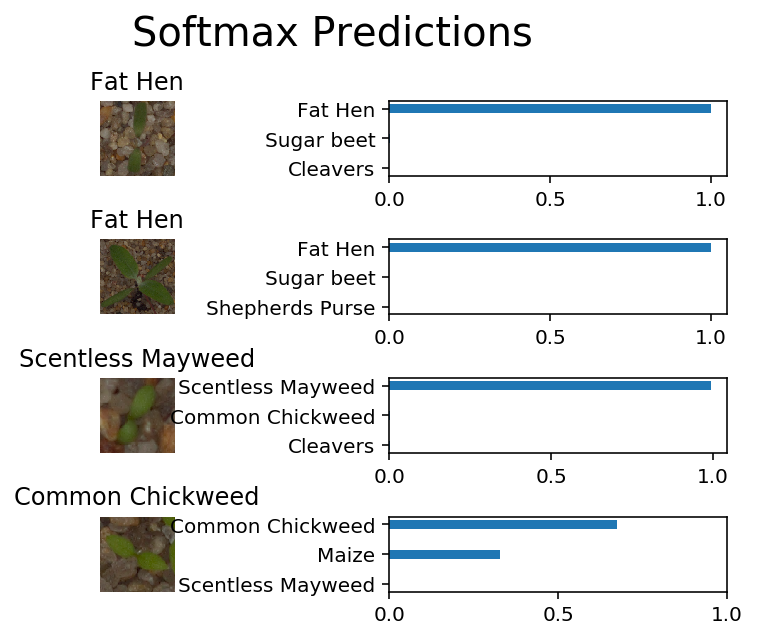

In [30]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

display_image_predictions(imgs[:4], labels[:4], predicted_display, 3)

# Submit

In [33]:
pic_src = "E:/PROJECT/kaggle-seedling-classification/dataset/test/"
all_files = os.listdir(pic_src)

print(len(submit_predicted))

794


In [34]:
class_index = ['Black-grass', 'Charlock', 
               'Cleavers', 'Common Chickweed', 
               'Common wheat', 'Fat Hen', 
               'Loose Silky-bent', 'Maize', 
               'Scentless Mayweed', 'Shepherds Purse', 
               'Small-flowered Cranesbill', 'Sugar beet']

import csv  

def as_num(x):
    y = '{:.6f}'.format(x) # 6f表示保留6位小数点的float型
    return(y)

with open('output.csv', 'w+', newline='') as csv_file:  
    writer = csv.writer(csv_file)
    writer.writerow(["file", "species"])
    for index, name in enumerate(all_files):
        class_name = class_index[np.argmax(submit_predicted[index])]
        writer.writerow([name, class_name])